# Çok Değişkenli Aykırı Gözlem Analizi

<font color=green>
    
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**

Bölüm 8 - Veri Ön İşleme - Vahit Keskin anlattı. 
- 236. Çok Değişkenli Aykırı Gözlem Analizi
    
- 237. Baskılama Yöntemi
    
</font>

### İçindekiler

**Giriş**

- Neden veri setine çok değişkenli olarak bakmamız lazım?

- Local Outlier Factor Nedir?

**1. Loading the Dataset**

**2. Aykırı Değerlerin Yakalanması**

Local Outlier Factor yöntemiyle aykırı değerleri yakalıyoruz.
- Eşik değeri buluyoruz.
- Aykırı değerleri buluyoruz.

**3. Aykırı Değer Problemini Çözmek**
- Silme Yöntemi
- Ortalama Yöntemi
- Baskılama Yöntemi
    - Aykırılar dataframe'ini indekssiz bir arraye çeviriyoruz.
    - baski_deger dataframe'ini de indekssiz bir arraye çeviriyoruz ve res'in değerlerini bunun değerleriyle değiştiriyoruz.
    - Yeni aykırı değerleri dataframe'imize dahil ediyoruz.

### <font color="blue"> Giriş </font>

#### Neden veri setine çok değişkenli olarak bakmamız lazım?

Tek başına yaş değişkeni veya evlilik sayısı değişkenine baktığımızda herhangi bir aykırılık gözlemlemezken iki değişken bir araya geldiğinde aykırılık söz konusu olabilir. Örneğin burada yaşlar kendi başına bakıldığında veya evlilik sayısına ayrı olarak bakıldığında herhangi bir aykırılık söz konusu değil fakat yaş ve evlilik sayısına bir arada baktığımızda 17 yaşında 3 evlilik yapmak aykırı bir gözlemdir.

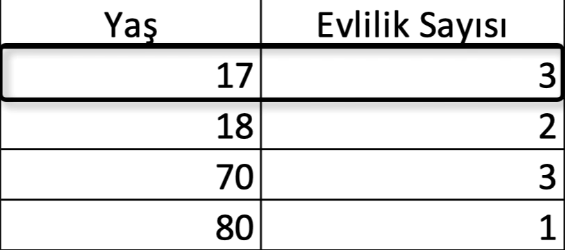

Bu yüzden çok değişkenli bir şekilde de aykırı gözlemleri göz önünde bulundurmak gerekmektedir. Bu gözlemleri tespit etme birisi LOF diye kısalttığımız Local Outlier Factor yöntemi. Bu notebookta bu yöntemin ne olduğunu, bu yöntemle aykırı değerleri nasıl yakaladığımızı, eşik değeri nasıl belirlediğimizi ve bu eşik değerini kullanarak aykırı değerleri nasıl düzenleyeceğimizi gördük.

#### Local Outlier Factor Nedir?

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak bu skorlara göre aykırı değer olabilecek gözlemleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapıyoruz. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriyoruz.

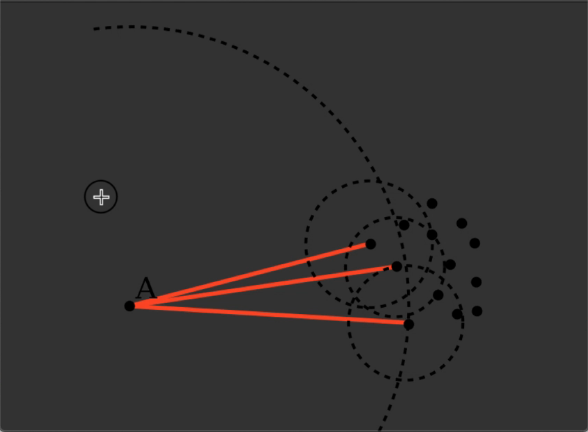

Bu resimde siyah noktaların her birisi birer gözlem. Örneğin sağ en üstteki gözleme odaklanacak olursak etrafında belirli uzaklıkta gözlem değerleri var. En altta kırmızı çizginin değdiği noktaya baksak bu noktanın da komşu yoğunluğu incelendiğinde en yakınında 3 tane komşuya baktığımızda çemberimizin çapını da görmüş oluyoruz. 

Anlaşılacağı üzere sağ taraftaki tüm noktaların örneğin 3 komşuluk sayısınca etrafındaki değerleri gözlemlediğimizde bu değerlerin etrafında belirli bir yoğunluk olduğunu gözlemliyoruz, belirli bir daire çiziliyor. A noktasına geldiğimizde; benzer şekilde 3 tane komşuya gitmeye çalışalım. A için en yakın olan 3 komşuya gittiğimizde aradaki mesafeler (kırmızı çizgilerin uzunluğu) diğer noktalarla karşılaştırıldığında çok daha fazla. Dolayısıyla A'nın yoğunluğu diğer noktalara göre çok çok daha düşük. 

Local Outlier Factor bize bu şekilde her bir gözlem birimi için bir skor veriyor. Eğer elimizde 100 tane gözlem varsa 100 tane gözlemin her birisi için yoğunluk skoru veriyor. Bu skorları biz daha sonra kullanarak tıpkı boxplotta yaptığımız gibi yani bir eşik değer skoru olarak kullanarak bu skorun üzerinde veya aşağısında kalan değerlere göre bir aykırı gözlem inceleme işlemi gerçekleştiriyoruz. 

## 1. Loading the Dataset

In [167]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [52]:
diamonds.shape

(53940, 7)

## 2. Aykırı Değerlerin Yakalanması

**Local Outlier Factor yöntemiyle aykırı değerleri yakalıyoruz.**

In [6]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [7]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1) # contamination yoğunluğu ifade ediyor.

- `contamination=0.1` aykırı değer yoğunluğunu %10 al demek oluyor. Outlier yoğunluğu veri setinin %10'undan fazla olmasın anlamında.

En fazla kullanılan değerler bunlar olduğu için bunları yazdık.

**clf nesnemiz LocalOutlierFactor'un biçimsel özelliklerini barındırıyor. Bunları kullanarak bir fit etme işlemi yani algoritmayı çalıştırma işlemi gerçekleştireceğiz.**

In [53]:
df_scores = clf.negative_outlier_factor_

**Şu an elimizde her bir gözlem birimi için elde edilmiş skorlar var.**

In [55]:
df_scores[0:20]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342,
       -1.23611906, -1.20830179, -1.17637026, -1.13060731, -1.14305176,
       -1.11364018, -1.21093135, -1.13307628, -1.08093519, -1.08139269])

**Buradaki bu skorlar elimizdeki her bir gözlem biriminin yoğunluk skoru/Local Outlier Factor skoru.**

In [56]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

**Sıraladık ve ilk 20'yi listeledik.**

### <font color=purple>2.1. Eşik değeri buluyoruz. </font>

**Eşik değeri belirleyip bunun altındaki değerleri aykırı değer olarak kabul edeceğiz. Bu eşik değeri sıçrama yaptığı noktayı tespit edip yapabiliriz. Bu bizim gerçek hayattaki bir problemimiz olsaydı tabi ki yine projenin hassaslığına, gözlem çokluğuna vb. durumlara bağlı olacaktı belirleyeceğimiz eşik değer.**

In [17]:
np.sort(df_scores)[13] # sıralanmış halinin 13. değerini aldık.

-3.823787967755565

**Bu değeri eşik değer kabul edeceğiz.**

In [39]:
esik_deger = np.sort(df_scores)[13]

### <font color=purple>2.2. Aykırı değerleri buluyoruz. </font>

In [57]:
aykiri_tf = df_scores < esik_deger # aykırı olanlar

In [58]:
aykiri_tf

array([False, False, False, ..., False, False, False])

In [64]:
aykiri_gozlemler = df[df_scores < esik_deger] 
aykiri_gozlemler

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


**Boxplot yönteminde örneğin table değişkenine göre tüm aykırılığı incelediğimizde yukarı yönlü ve aşağı yönlü olacak şekilde aykırı koşulunu çalıştırdığımızda çok çok daha fazla gözlem birimi gelmişti. Çok değişkenli bir şekilde aykırı değerleri incelediğimizde burada çok daha az sayıda gözlemin geldiği gözüküyor.**

## 3. Aykırı Değer Problemini Çözmek

### <font color=purple>3.1. Silme Yöntemi</font>

**Aykırı değerleri dışarıda bıraktığımızda silme işlemini gerçekleştirmiş oluyoruz.**

In [61]:
yeni_df = df[df_scores > esik_deger] 

In [62]:
yeni_df # aykırı olmayan gözlemler

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### <font color=purple>3.2. Ortalama Yöntemi</font>

<font color=gray>*Kendim yaptım, videoda yok.*</font>

**Eğer ortalamaları atamak istersek burada yakalamış olduğumuz bu df'in değerlerine ortalama değerleri atayabiliriz.** 

In [144]:
deneme_outliers = df[df_scores < esik_deger]
deneme_outliers

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [156]:
df_deneme = df.copy()

In [157]:
df_deneme.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [158]:
deneme_outliers.index

Int64Index([ 6341, 10377, 24067, 35633, 36503, 38840, 41918, 45688, 48410,
            49189, 50773, 52860, 52861],
           dtype='int64')

In [159]:
deneme_outliers.iloc[0]

carat       1.00
depth      44.00
table      53.00
price    4032.00
x           6.31
y           6.24
z           4.12
Name: 6341, dtype: float64

In [160]:
for row in range(len(deneme_outliers.index)):
    #print(deneme_outliers.index[row])
    #print(df_deneme.iloc[deneme_outliers.index[row]])
    
    df_deneme.iloc[deneme_outliers.index[row]] = df_deneme.mean()

In [161]:
df_deneme.iloc[6341]

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
Name: 6341, dtype: float64

In [165]:
df_deneme.iloc[deneme_outliers.index]

,carat,depth,table,price,x,y,z
6341,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
10377,0.797936,61.749734,57.457267,3932.797883,5.731146,5.734517,3.538723
24067,0.797931,61.750082,57.457331,3932.782214,5.731132,5.734501,3.538712
35633,0.797908,61.750134,57.457339,3932.628761,5.731088,5.733516,3.538628
36503,0.797918,61.750115,57.457589,3932.692881,5.731116,5.733544,3.538645
38840,0.797927,61.750314,57.457412,3932.748270,5.731136,5.733564,3.538667
41918,0.797928,61.750146,57.457457,3932.801732,5.731140,5.733571,3.538661
45688,0.797924,61.749841,57.457521,3932.851247,5.731140,5.733574,3.538645
48410,0.797926,61.749659,57.457567,3932.892716,5.731145,5.733583,3.538639
49189,0.797931,61.749658,57.457618,3932.929106,5.731156,5.733593,3.538115


### <font color=purple>3.3. Baskılama Yöntemi</font>

Ortalama için burada her bir değişken için aykırılıklara gidip ortalamayı atamak gerekiyor. Fakat burada baskılama yöntemi veya eşik değerin indeksinde olan değerlerin değerlerini atamak çok değişkenlide en mantıklı yaklaşım olabiliyor.

In [ ]:
# esik_deger = np.sort(df_scores)[13]

In [168]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


*Eşik değeri nasıl belirlemiştik? Local Outlier Factor dediğimiz yoğunluk tabanlı bir skor oluşturmuştuk, bu skorları kaydetmiştik (df_scores). Bu skorların içerisinden 13. indeksteki değeri eşik değer olarak belirlemiştik. Bu eşik değerin belirlemiş olduğumuz skora karşılık gelen nümerik gözlem birimi de bu gözlem birimiymiş.*

**Aykırı gözlemlerin yerine bu eşik değerine karşılık gelen değerleri atayabiliriz.** 

In [169]:
baski_deger = df[df_scores == esik_deger]
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [170]:
aykirilar = df[aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


Bu elimizdeki mevcut aykırıların yerine eşik değerdeki değerleri atarken bazı indeks problemleri ortaya çıkacak. Bu indeks problemlerini giderebilmek adına birkaç işlem yapacağız. 

1. Aykırılar dataframe'ini indekssiz bir arraye çevireceğiz. 

2. Baski gözlemini de arrayleştirip atama işlemi gerçekleştireceğiz. 

3. Son basamakta da aykırı değerleri baskı değeri ile değiştirmiş olacağız.

#### <font color=green> **Aykırılar dataframe'ini indekssiz bir arraye çeviriyoruz.**</font> 

In [171]:
res = aykirilar.to_records(index = False) 

# baştan indeks oluşturma işlemi olacak.

In [172]:
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [175]:
res[:]

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

**Aykiriları aldı bir numpy arrayine çevirdi. Dolayısıyla elimizde sadece değerler var, indeksler yok.**

#### <font color=green> **baski_deger dataframe'ini de indekssiz bir arraye çeviriyoruz ve res'in değerlerini bunun değerleriyle değiştiriyoruz.**</font> 

In [176]:
res[:] = baski_deger.to_records(index=False) 

In [177]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

**Bütün aykırıların yerine eşik değerimiz yani baskılayacak olduğumuz değerimizin tüm değişkenlerinin değerlerini doldurmuş olduk. Şimdi şöyle bir problemimiz var bu ayrı bir array. Aykırılar ayrı bir array. Ama ana dataframe'imiz içerisinde bu yapı böyle değil. Bunu düzelteceğiz.**

#### <font color=green> **Yeni aykırı değerleri dataframe'imize dahil ediyoruz.**</font>

Aykırıları listeliyoruz. Aykırılıklarda bir değişiklik yok.

In [178]:
df[aykiri_tf] 

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


**Yeni aykırı değerleri içeren res'i dataframe'e çeviriyoruz. Çevirirken index olarak aykırı değerlerin indeksini indeks olarak belirliyoruz.** 

In [179]:
pd.DataFrame(res, index = df[aykiri_tf].index)

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


**Şimdi bunu yeni `df[aykiri_tf]` olarak tanımlayacağız.**

In [180]:
import pandas as pd

df[aykiri_tf] = pd.DataFrame(res, index = df[aykiri_tf].index) 

**Orijinal veri setimiz içerisindeki aykırı değerlerin yerine bir sabit bir eşik değerine karşılık gelen değerleri baskılayıcı değer olarak atamış olduk.**

In [181]:
df[aykiri_tf] 

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


**Bütün aykırı gözlemler LOF yardımıyla artık eşik değer olarak belirlediğimiz değere karşılık gelen gözlemin değerlerince oluşturulmuş oldu.**